<a href="https://colab.research.google.com/github/hindia-vic/deep_learning/blob/main/transef_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Transfer larning using mobilenet_v2




In [1]:
import numpy as np
import pandas as pd
import os
import PIL.Image as Image
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
import cv2

In [3]:
#loading the model
IMAGE_SHAPE = (224, 224)

# Load the full MobileNetV2 model for classification
classifier = hub.KerasLayer(
    "https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4",
    input_shape=IMAGE_SHAPE+(3,)
)


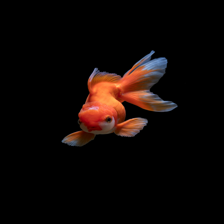

In [7]:
gold_fish=Image.open('/content/sample_data/zhengtao-tang-V7SKRhXskv8-unsplash.jpg').resize(IMAGE_SHAPE)
gold_fish

In [8]:
#performing scaling
gold_fish = np.array(gold_fish)/255.0
gold_fish.shape

(224, 224, 3)

In [9]:
gold_fish[np.newaxis, ...]

array([[[[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        ...,

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]]]])

In [12]:
result = classifier(gold_fish[np.newaxis, ...])
result.shape


TensorShape([1, 1001])

In [13]:
predict_label=np.argmax(result)
predict_label

2

In [14]:
# Load the ImageNet class labels
labels_path = tf.keras.utils.get_file(
    'ImageNetLabels.txt',
    'https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt'
)

10484/10484 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [15]:
# Read the labels file
with open(labels_path, "r") as f:
    labels = f.read().splitlines()


In [16]:
# Get the class name
predicted_class_name = labels[predict_label]
print(f"Predicted class: {predicted_class_name}")

Predicted class: goldfish


In [17]:
#downloading google flower dataset
data_url='https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz'
data_dir=tf.keras.utils.get_file('flower_photos',origin=data_url,untar=True)

228813984/228813984 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [18]:
data_dir

'/root/.keras/datasets/flower_photos'

In [19]:
import pathlib
data_dir=pathlib.Path(data_dir)
data_dir

PosixPath('/root/.keras/datasets/flower_photos')

In [20]:
#counting the images in dataset
image_count=len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


In [21]:
flower_image_dict={
    'roses':list(data_dir.glob('roses/*')),
    'daisy':list(data_dir.glob('daisy/*')),
    'dandelion':list(data_dir.glob('dandelion/*')),
    'sunflowers':list(data_dir.glob('sunflowers/*')),
    'tulips':list(data_dir.glob('tulips/*')),
}

In [22]:
#converting images labels into numbers
flower_labels_dict={
    'roses':0,
    'daisy':1,
    'dandelion':2,
    'sunflowers':3,
    'tulips':4,
}

In [23]:
img=cv2.imread(str(flower_image_dict['roses'][0]))
img.shape

(333, 500, 3)

In [25]:
#resize the images
cv2.resize(img,IMAGE_SHAPE).shape


(224, 224, 3)

In [26]:
X,y=[],[]
for flower_name,images in flower_image_dict.items():
  for image in images:
    img=cv2.imread(str(image))
    resized_img=cv2.resize(img,IMAGE_SHAPE)
    X.append(resized_img)
    y.append(flower_labels_dict[flower_name])

In [27]:
#scaling x and y
X=np.array(X)
y=np.array(y)

In [29]:
#splitting the data into train and test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)

In [30]:
#scaling the train and test

X_train_scaled=X_train/255
X_test_scaled=X_test/255

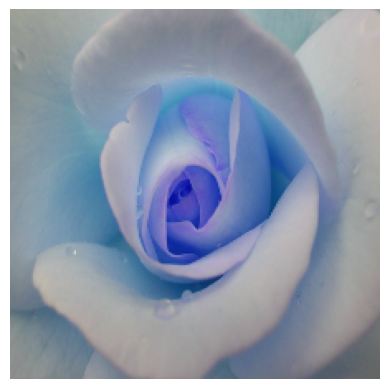

In [40]:
plt.axis('off')
plt.imshow(X_train_scaled[5])

In [41]:
#using the model to predict
predicted=classifier(X_test_scaled[0][np.newaxis, ...])
predicted=np.argmax(predicted)
predicted

739

In [42]:
predicted_class_name = labels[predicted]
print(f"Predicted class: {predicted_class_name}")

Predicted class: pot


In [53]:
# Define the feature extractor layer using MobileNetV2
feature_extractor_layer = hub.KerasLayer(
    "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4",
    input_shape=(224, 224, 3),
    trainable=False  # Freeze the pre-trained weights
)

In [65]:
model = tf.keras.Sequential([
    feature_extractor_layer,  # Add the feature extractor layer
    tf.keras.layers.Dense(5, activation='softmax')  # Final layer for classification with 5 classes
])
model.summary()



ValueError: Only instances of `keras.Layer` can be added to a Sequential model. Received: <tensorflow_hub.keras_layer.KerasLayer object at 0x7c725cee6bc0> (of type <class 'tensorflow_hub.keras_layer.KerasLayer'>)